<a href="https://colab.research.google.com/github/lorebianchi98/BrainTumorClassification/blob/main/8_ModelRecap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Recap
In this notebook we mantain the results of the best models found for each type of network.

# Import and Costants

In [ ]:
!pip install tensorflow_addons
!pip install --quiet vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.7 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive
import tensorflow_addons as tfa
from vit_keras import vit

# Connection to Google Drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
% run /content/gdrive/MyDrive/BrainTumorClassifier/utilities.ipynb

We also perform the download and the unzipping of the dataset from the drive folder.

In [ ]:
!unzip -q '/content/gdrive/MyDrive/BrainTumorClassifier/brain-tumor-mri-splits.zip' -d '/'

# Dataset loading

Now we need to create the Dataset objects from the sets directory. We use the [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) function provided by Keras. 

In [ ]:
train_ds, val_ds, test_ds = load_data_splits(IMAGE_SIZE, BATCH_SIZE)

Found 4213 files belonging to 4 classes.
Found 1404 files belonging to 4 classes.
Found 1406 files belonging to 4 classes.


# Model Loading
We load the best model for each type of network trained (the CNN from scratch, VGG16, ResNet and Densenet). As parameter to value a model we considered the loss on the test set.

In [ ]:
from_scratch_model = models.load_model(MODELS_PATH + '/Dense512Neurons_TwoDropouts0-3_AdditionalLayer/Dense512Neurons_TwoDropouts0-3_AdditionalLayer.h5')
vgg_model = models.load_model(MODELS_PATH + '/VGG16_LastBlockFineTuned/VGG16_LastBlockFineTuned.h5')
resnet_model = models.load_model(MODELS_PATH + '/ResNet50_Finetuned/ResNet50_Finetuned.h5')
densenet_model = models.load_model(MODELS_PATH + '/DenseNet121_Finetuned/DenseNet121_Finetuned.h5')
vit_model = models.load_model(MODELS_PATH+ "/VisionTransformerb32_Dense256_Finetuning/"+"VisionTransformerb32_Dense256_Finetuning.h5")

# Model Evaluation

22/22 [==============================] - 11s 74ms/step - loss: 0.1380 - accuracy: 0.9623
Loss on test set: 0.13795408606529236
Accuracy on test set: 0.962304413318634
              precision    recall  f1-score   support

      glioma     0.9601    0.9631    0.9616       325
  meningioma     0.9281    0.9422    0.9351       329
     notumor     0.9826    0.9875    0.9850       400
   pituitary     0.9738    0.9517    0.9626       352

    accuracy                         0.9623      1406
   macro avg     0.9612    0.9611    0.9611      1406
weighted avg     0.9625    0.9623    0.9623      1406

22/22 [==============================] - 1s 67ms/step


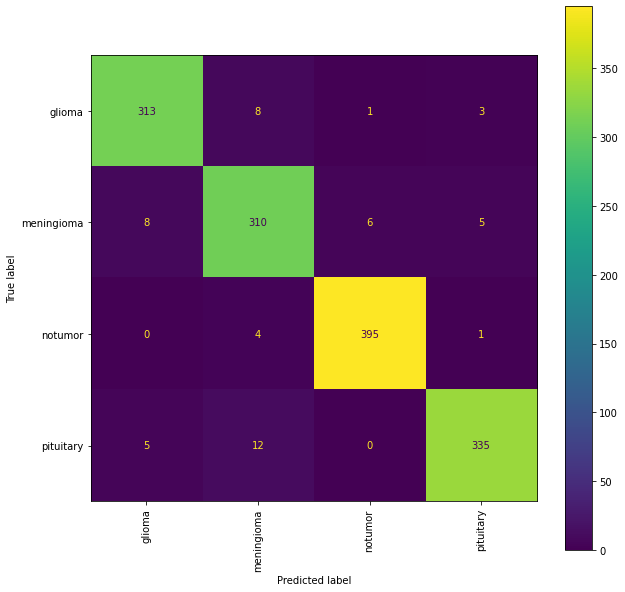

In [ ]:
evaluate_model(from_scratch_model, test_ds)
plot_confusionmatrix(from_scratch_model, test_ds)

22/22 [==============================] - 6s 219ms/step - loss: 0.1687 - accuracy: 0.9680
Loss on test set: 0.16874152421951294
Accuracy on test set: 0.9679943323135376
              precision    recall  f1-score   support

      glioma     0.9664    0.9723    0.9693       325
  meningioma     0.9371    0.9514    0.9442       329
     notumor     0.9899    0.9800    0.9849       400
   pituitary     0.9742    0.9659    0.9700       352

    accuracy                         0.9680      1406
   macro avg     0.9669    0.9674    0.9671      1406
weighted avg     0.9682    0.9680    0.9681      1406

22/22 [==============================] - 3s 160ms/step


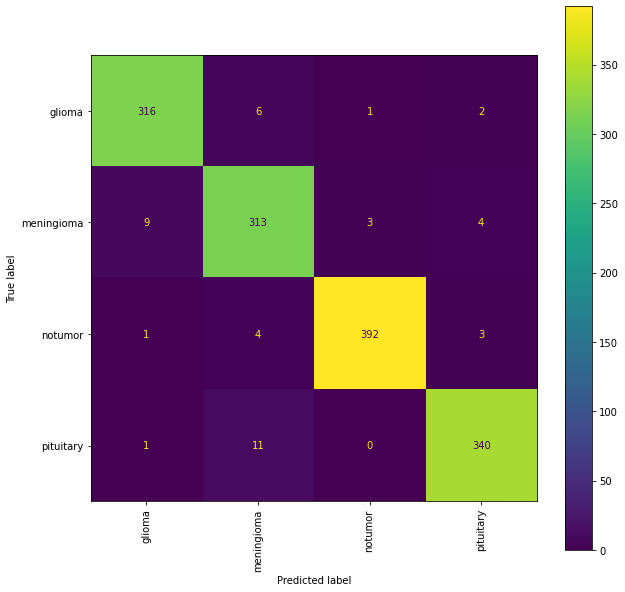

In [ ]:
evaluate_model(vgg_model, test_ds)
plot_confusionmatrix(vgg_model, test_ds)

22/22 [==============================] - 4s 136ms/step - loss: 0.1802 - accuracy: 0.9438
Loss on test set: 0.18023884296417236
Accuracy on test set: 0.9438122510910034
              precision    recall  f1-score   support

      glioma     0.9215    0.9385    0.9299       325
  meningioma     0.8912    0.8967    0.8939       329
     notumor     0.9825    0.9850    0.9838       400
   pituitary     0.9708    0.9460    0.9583       352

    accuracy                         0.9438      1406
   macro avg     0.9415    0.9415    0.9415      1406
weighted avg     0.9441    0.9438    0.9439      1406

22/22 [==============================] - 3s 118ms/step


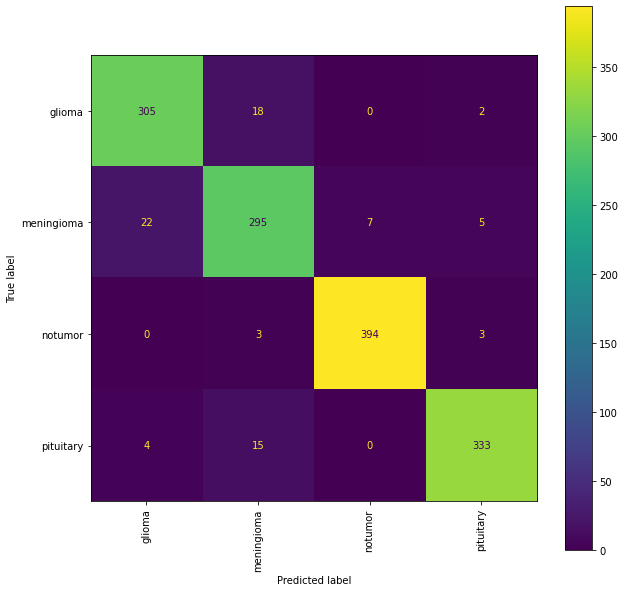

In [ ]:
evaluate_model(resnet_model, test_ds)
plot_confusionmatrix(resnet_model, test_ds)

22/22 [==============================] - 6s 151ms/step - loss: 0.1604 - accuracy: 0.9509
Loss on test set: 0.1603803038597107
Accuracy on test set: 0.9509246349334717
              precision    recall  f1-score   support

      glioma     0.9275    0.9446    0.9360       325
  meningioma     0.9094    0.9149    0.9121       329
     notumor     0.9778    0.9925    0.9851       400
   pituitary     0.9822    0.9432    0.9623       352

    accuracy                         0.9509      1406
   macro avg     0.9492    0.9488    0.9489      1406
weighted avg     0.9513    0.9509    0.9510      1406

22/22 [==============================] - 3s 119ms/step


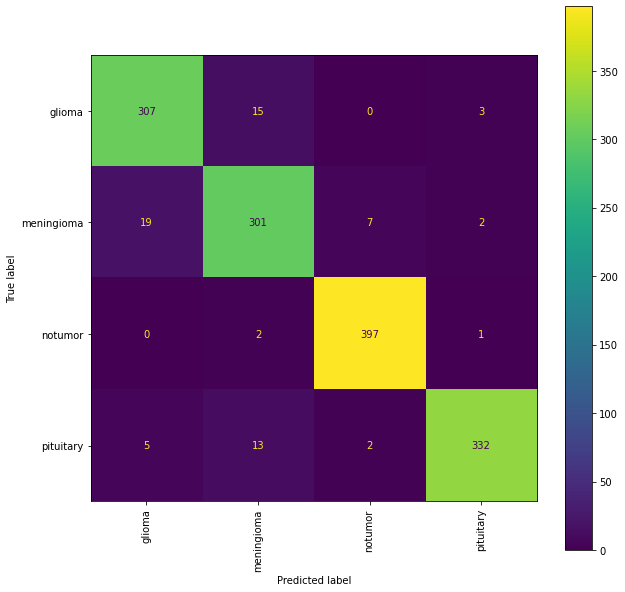

In [ ]:
evaluate_model(densenet_model, test_ds)
plot_confusionmatrix(densenet_model, test_ds)

22/22 [==============================] - 7s 177ms/step - loss: 0.1521 - accuracy: 0.9651
Loss on test set: 0.1521253138780594
Accuracy on test set: 0.9651493430137634
              precision    recall  f1-score   support

      glioma     0.9428    0.9631    0.9528       325
  meningioma     0.9375    0.9574    0.9474       329
     notumor     0.9975    0.9850    0.9912       400
   pituitary     0.9767    0.9517    0.9640       352

    accuracy                         0.9651      1406
   macro avg     0.9636    0.9643    0.9639      1406
weighted avg     0.9656    0.9651    0.9653      1406

22/22 [==============================] - 4s 172ms/step


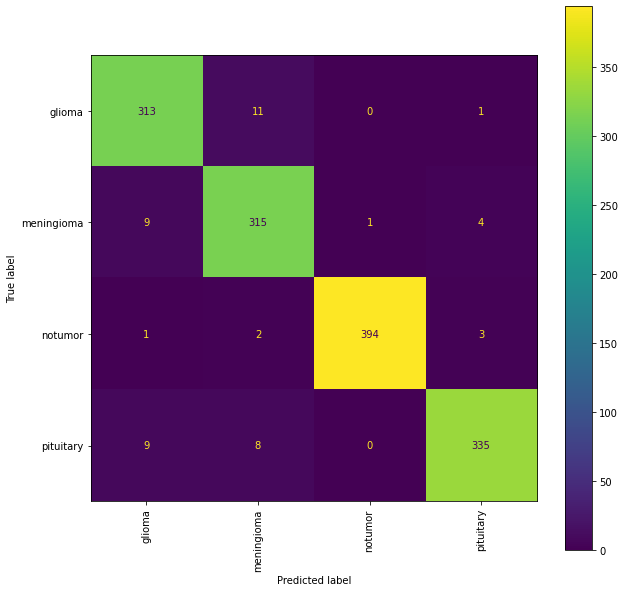

In [ ]:
evaluate_model(vit_model, test_ds)
plot_confusionmatrix(vit_model, test_ds)